<a href="https://colab.research.google.com/github/asim5800/Retail-Sales-Prediction/blob/main/Asim_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [50]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
#importing libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
%matplotlib inline

In [52]:
#loading and reading TELECOM CHURN CSV file
rossman_df= pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction - Asim Siddiqui/Rossmann Stores Data.csv', low_memory= False)

In [53]:
store_df = pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction - Asim Siddiqui/Store.csv')

In [54]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [55]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [56]:
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [57]:
#making copy
#rossman_df_temp= rossman_df.copy()
#store_df_temp=store_df.copy()

In [58]:
#sorting dataframe date order
rossman_df.sort_values(by=['Date'],inplace=True, ascending= True)
rossman_df.Date.head(5)


1017208    2013-01-01
1016473    2013-01-01
1016472    2013-01-01
1016471    2013-01-01
1016470    2013-01-01
Name: Date, dtype: object

In [59]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [60]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [61]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

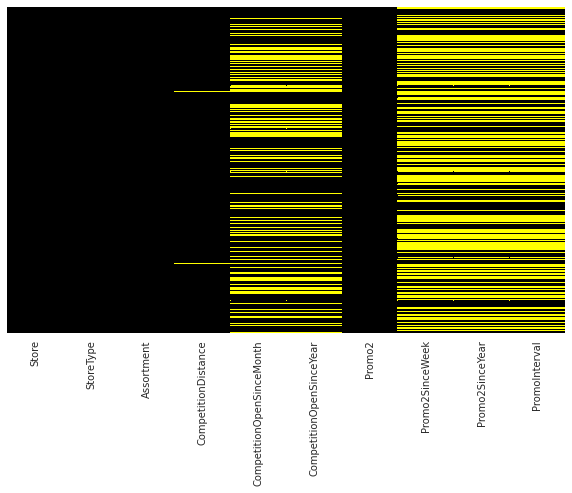

In [62]:
# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

In [63]:
#dropping those columns having more null values
store_df = store_df.drop(['Promo2SinceWeek','Promo2SinceYear', 'PromoInterval','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'], axis=1)

In [64]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1115 non-null   int64  
 1   StoreType            1115 non-null   object 
 2   Assortment           1115 non-null   object 
 3   CompetitionDistance  1112 non-null   float64
 4   Promo2               1115 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 43.7+ KB


In [65]:
#checking null values again
store_df.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    3
Promo2                 0
dtype: int64

In [66]:
missing_col = ['CompetitionDistance']
#Technique 1: Using medain to impute the missing values as median is more robust to outliers
for i in missing_col:
 store_df.loc[store_df.loc[:,i].isnull(),i]=store_df.loc[:,i].median()

In [67]:
store_df.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

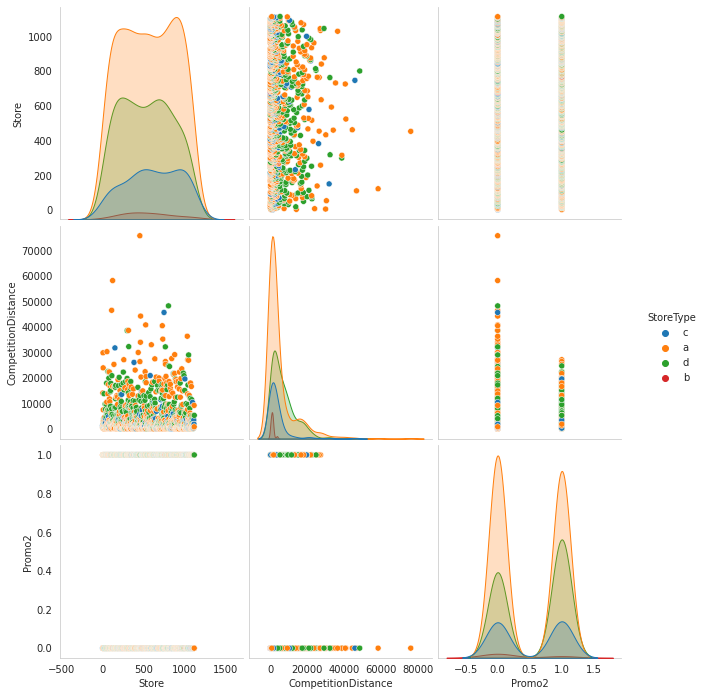

In [68]:

sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);


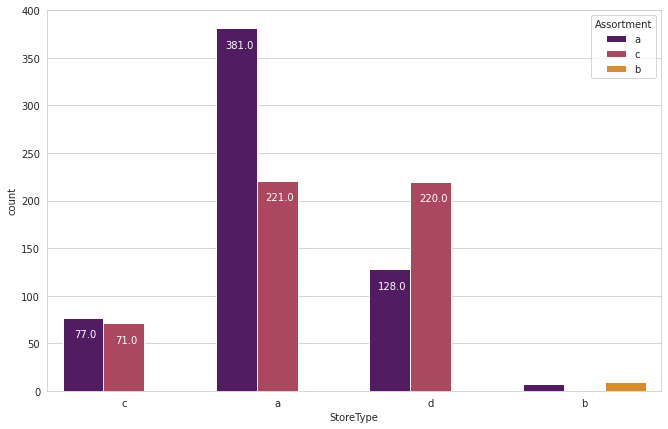

In [69]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)


In [70]:
store_df['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [71]:
#dropping assortment of b type
store_df.drop(store_df.index[store_df['Assortment'] == 'b'], inplace = True)

In [72]:
print(store_df.shape)
store_df.describe()


(1106, 5)


,Store,CompetitionDistance,Promo2
count,1106.000000,1106.000000,1106.000000
mean,557.458409,5430.944846,0.512658
std,322.279798,7675.639569,0.500066
min,1.000000,20.000000,0.000000
25%,279.250000,720.000000,0.000000
50%,557.500000,2330.000000,1.000000
75%,836.750000,6897.500000,1.000000
max,1115.000000,75860.000000,1.000000


***cleaned store data  & now proceeding to Rossman df*** 

In [73]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2'], dtype='object')

In [74]:
rossman_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

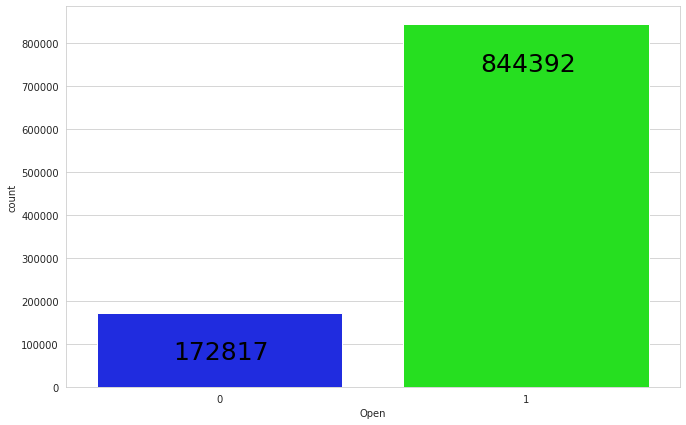

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
op=sns.countplot(x='Open', data=rossman_df,palette="hsv_r")

for p in op.patches:
    op.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()), va='top', color='black', size=25)
plt.show() # these 172817 wont generate any sales so we should remove these stores

In [76]:
rossman_df.drop(rossman_df.index[rossman_df['Open'] == 0], inplace = True)
#dropping those observation where sales are 0
rossman_df = rossman_df[rossman_df.Sales != 0]

In [77]:
rossman_df.shape

(844338, 9)

***Cleaned rossman data***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


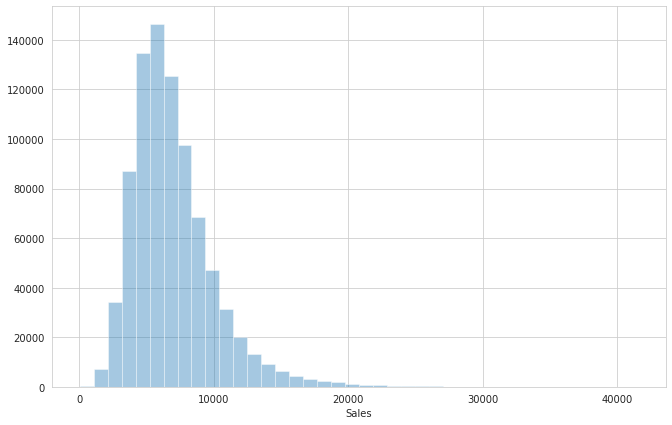

In [78]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(rossman_df['Sales'], kde = False,bins=40);

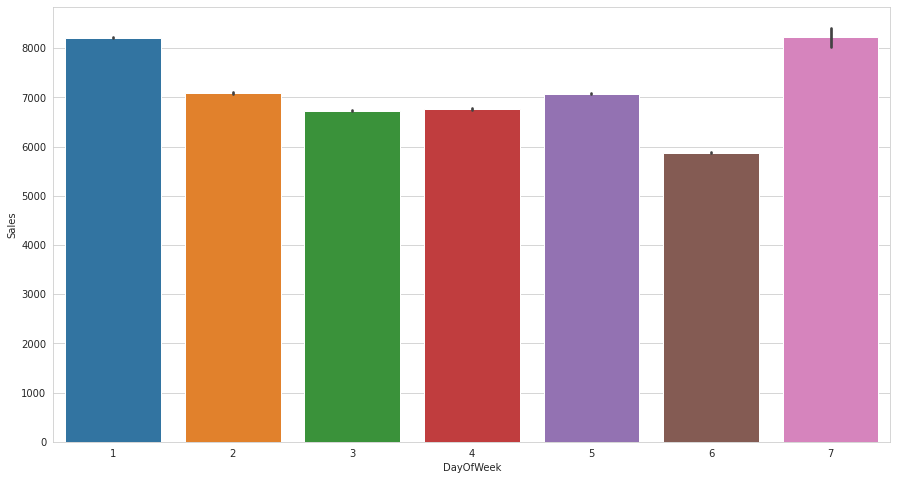

In [79]:
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=rossman_df); # on an averege we have most of our sales on 1st and last day of week 

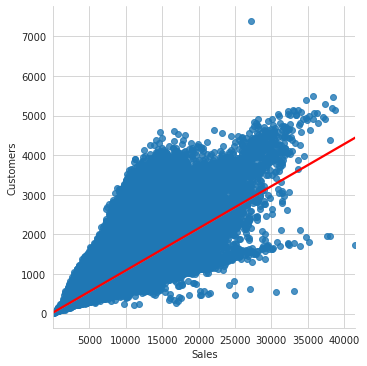

In [80]:
#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=rossman_df, palette='seismic', height=5,aspect=1,line_kws={'color': 'red'} );


In [81]:
rossman_df['Date'].nunique()

942

In [82]:
#extracting year,month,week
rossman_df['Year'] = pd.DatetimeIndex(rossman_df['Date']).year
rossman_df['Month'] = pd.DatetimeIndex(rossman_df['Date']).month
rossman_df['week_of_year'] =pd.DatetimeIndex(rossman_df['Date']).week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


In [83]:
rossman_df.drop(['Date'], axis=1,inplace= True)

In [84]:
print(rossman_df.shape)
rossman_df.tail()

(844338, 11)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,week_of_year
745,746,5,9082,638,1,1,0,1,2015,7,31
746,747,5,10708,826,1,1,0,1,2015,7,31
747,748,5,7481,578,1,1,0,1,2015,7,31
741,742,5,10460,1016,1,1,0,1,2015,7,31
0,1,5,5263,555,1,1,0,1,2015,7,31


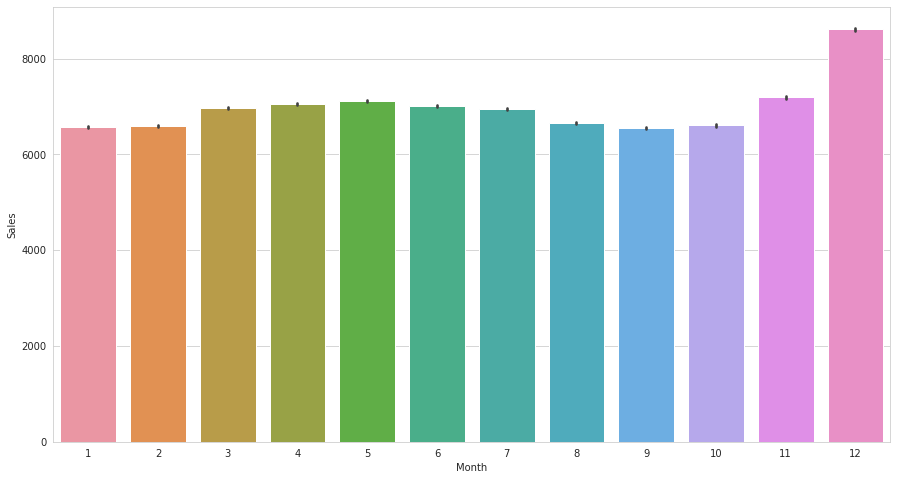

In [98]:
plt.figure(figsize=(15,8))
sns.barplot(x='Month',y='Sales',data=rossman_df );

In [86]:
rossman_df['Year'].nunique()

3

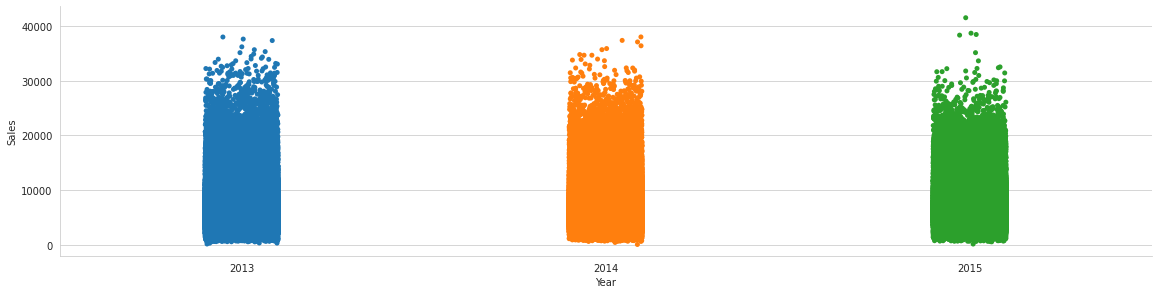

In [87]:
#year vs sales
sns.catplot(x='Year',y='Sales',data=rossman_df, height=4, aspect=4 ); # since each year is showing pretty much same value we can drop the year too  

In [88]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844338 non-null  int64  
 1   DayOfWeek            844338 non-null  int64  
 2   Sales                844338 non-null  int64  
 3   Customers            844338 non-null  int64  
 4   Open                 844338 non-null  int64  
 5   Promo                844338 non-null  int64  
 6   StateHoliday         844338 non-null  object 
 7   SchoolHoliday        844338 non-null  int64  
 8   Year                 844338 non-null  int64  
 9   Month                844338 non-null  int64  
 10  week_of_year         844338 non-null  int64  
 11  StoreType            836129 non-null  object 
 12  Assortment           836129 non-null  object 
 13  CompetitionDistance  836129 non-null  float64
 14  Promo2               836129 non-null  float64
dtypes: float64(2), in

In [90]:
df.isna().sum()

Store                     0
DayOfWeek                 0
Sales                     0
Customers                 0
Open                      0
Promo                     0
StateHoliday              0
SchoolHoliday             0
Year                      0
Month                     0
week_of_year              0
StoreType              8209
Assortment             8209
CompetitionDistance    8209
Promo2                 8209
dtype: int64

In [91]:
#find columns which have string
for label, content in df.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

StateHoliday
StoreType
Assortment


In [92]:
#string into categories
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
         df[label]=content.astype('category').cat.as_ordered()

In [93]:

df.info()
print(df.isnull().sum()/len(df))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Store                844338 non-null  int64   
 1   DayOfWeek            844338 non-null  int64   
 2   Sales                844338 non-null  int64   
 3   Customers            844338 non-null  int64   
 4   Open                 844338 non-null  int64   
 5   Promo                844338 non-null  int64   
 6   StateHoliday         844338 non-null  category
 7   SchoolHoliday        844338 non-null  int64   
 8   Year                 844338 non-null  int64   
 9   Month                844338 non-null  int64   
 10  week_of_year         844338 non-null  int64   
 11  StoreType            836129 non-null  category
 12  Assortment           836129 non-null  category
 13  CompetitionDistance  836129 non-null  float64 
 14  Promo2               836129 non-null  float64 
dtype

In [100]:
df = df.dropna(how='any',axis=0) 


In [101]:
df.shape

(836129, 15)

In [102]:
df_temp=df.copy()

In [103]:
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
      df_temp[label]=pd.Categorical(content).codes+1 #turning categories into numbers

In [108]:
df_temp.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2
844333,746,5,9082,638,1,1,1,1,2015,7,31,4,2,4330.0,1.0
844334,747,5,10708,826,1,1,1,1,2015,7,31,3,2,45740.0,0.0
844335,748,5,7481,578,1,1,1,1,2015,7,31,4,1,2380.0,1.0
844336,742,5,10460,1016,1,1,1,1,2015,7,31,4,2,4380.0,0.0
844337,1,5,5263,555,1,1,1,1,2015,7,31,3,1,1270.0,0.0


In [109]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836129 entries, 1 to 844337
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                836129 non-null  int64  
 1   DayOfWeek            836129 non-null  int64  
 2   Sales                836129 non-null  int64  
 3   Customers            836129 non-null  int64  
 4   Open                 836129 non-null  int64  
 5   Promo                836129 non-null  int64  
 6   StateHoliday         836129 non-null  int8   
 7   SchoolHoliday        836129 non-null  int64  
 8   Year                 836129 non-null  int64  
 9   Month                836129 non-null  int64  
 10  week_of_year         836129 non-null  int64  
 11  StoreType            836129 non-null  int8   
 12  Assortment           836129 non-null  int8   
 13  CompetitionDistance  836129 non-null  float64
 14  Promo2               836129 non-null  float64
dtypes: float64(2), in

In [113]:
df1=df_temp.copy()

In [115]:
# converting all columns to int64
cols = ['CompetitionDistance', 'Promo2','StoreType', 'Assortment', 'StateHoliday']
df1[cols] = df1[cols].applymap(np.int64)

In [117]:
df1.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,week_of_year,StoreType,Assortment,CompetitionDistance,Promo2
1,335,2,2401,482,1,0,2,1,2013,1,1,2,1,90,1
3,494,2,3113,527,1,0,2,1,2013,1,1,2,1,1260,0
4,530,2,2907,532,1,0,2,1,2013,1,1,1,2,18160,0
5,423,2,9643,1751,1,0,2,1,2013,1,1,2,1,1270,0
6,85,2,4220,619,1,0,2,1,2013,1,1,2,1,1870,0


In [118]:
len(df1)

836129

#Now that our Data set has only numeric values we go for ML

In [119]:
#model 
%%time
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_jobs=-1,random_state=101) 
model.fit(df1.drop('Sales',axis=1),df1['Sales']) #x,y

CPU times: user 13min 21s, sys: 9.1 s, total: 13min 30s
Wall time: 6min 54s


In [120]:
#scoring model
model.score(df1.drop('Sales',axis=1),df1['Sales'])

0.9965963490341314

In [124]:
# WE have to split and test otherwise it'll show this score which is not relaible
df1_val=  df1[df1.Year == 2015]

df1_train= df1[df1.Year != 2015]

len(df1_val), len(df1_train)

(194121, 642008)

In [127]:
#split data into x and y

X_train,y_train = df1_train.drop('Sales',axis=1),df1_train.Sales

X_valid, y_valid =df1_val.drop('Sales',axis= 1), df1_val.Sales

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape 


((642008, 14), (642008,), (194121, 14), (194121,))

In [128]:
y_train

1         2401
3         3113
4         2907
5         9643
6         4220
          ... 
648304    4265
648305    4066
648306    4415
648307    3753
648308    1812
Name: Sales, Length: 642008, dtype: int64